# **Lab Task: Build K‑Nearest Neighbors (KNN) Classifier from Scratch**

## **Objective :**
- Implement the KNN classification algorithm in Python without using scikit‑learn’s KNeighborsClassifier.

- Practice data loading, cleaning, feature scaling, and train/test splitting.

- Evaluate your classifier’s performance using accuracy, precision, recall, and a confusion matrix.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time

## **1. Data loading**


In [ ]:
# Load the dataset
df = pd.read_csv("/dataset.csv", index_col='id').reset_index(drop=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## **2. Data Preprocessing**
In this step, you should analyze yourself which preprocessing steps need to be done and apply all that are needed for the dataset.
For example:
- **Identify missing values and handling them appropriately**
- **Feature scaling where needed**
- **Train/Test split**: Split into 70% train / 30% test (use random_state=42).

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import time

# Load the dataset
df = pd.read_csv("/dataset.csv", index_col='id').reset_index(drop=True)

# Data Preprocessing
# Check for missing values
#print("Missing values per column:\n", df.isnull().sum())

# Fill missing values with mean (because only few are missing)
#df.fillna(df.mean(), inplace=True)
# Fill missing values only in numeric columns
df.fillna(df.mean(numeric_only=True), inplace=True)

print("Missing values per column:\n", df.isnull().sum())


# Encode 'diagnosis' column: M -> 1, B -> 0
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Separate features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Feature Scaling (important for kNN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split (70%-30%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)



print("\nTrain shape:", X_train.shape)
print("Test shape:", X_test.shape)

Missing values per column:
 diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Train shape: (398, 30)
Test shape: (171, 30)


## **Implement KNN Class**

In [23]:
class kNN():
    '''k-Nearest Neighbours'''

    def __init__(self, k=3, metric='euclidean', p=None):
        self.k = k
        self.metric = metric
        self.p = p

    # Euclidean distance (l2 norm)
    def euclidean(self, v1, v2):
        return np.sqrt(np.sum((v1 - v2)**2))

    # Manhattan distance (l1 norm)
    def manhattan(self, v1, v2):
        return np.sum(np.abs(v1 - v2))

    # Minkowski distance (lp norm)
    def minkowski(self, v1, v2, p=2):
        return np.sum(np.abs(v1 - v2)**p)**(1/p)

    # Store train set
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    # Get nearest neighbours
    def get_neighbours(self, test_row):
        distances = []

        for i, train_row in enumerate(self.X_train):
            if self.metric == 'euclidean':
                dist = self.euclidean(test_row, train_row)
            elif self.metric == 'manhattan':
                dist = self.manhattan(test_row, train_row)
            elif self.metric == 'minkowski':
                dist = self.minkowski(test_row, train_row, self.p)
            else:
                raise ValueError("Invalid metric. Choose from 'euclidean', 'manhattan', or 'minkowski'")

            distances.append((i, dist))

        # Sort distances and get k nearest neighbors
        distances.sort(key=lambda x: x[1])
        neighbors = distances[:self.k]
        return neighbors

    # Make predictions
    def predict(self, X_test):
        predictions = []

        for test_row in X_test:
            neighbors = self.get_neighbours(test_row)
            neighbor_indices = [n[0] for n in neighbors]
            neighbor_labels = self.y_train.iloc[neighbor_indices]

            # Majority vote
            pred = np.argmax(np.bincount(neighbor_labels))
            predictions.append(pred)

        return np.array(predictions)

## **Evaluate the model**


Fine the following performance matrices results:
- Accuracy (overall correct rate)

- Precision (true positives ÷ predicted positives)

- Recall (true positives ÷ actual positives)

- Confusion Matrix

- Classfication Report

Evaluation Metrics (k=3):
Accuracy: 0.9591
Precision: 0.9516
Recall: 0.9365
Confusion Matrix:
[[105   3]
 [  4  59]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       108
           1       0.95      0.94      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

Prediction time: 0.5138 seconds


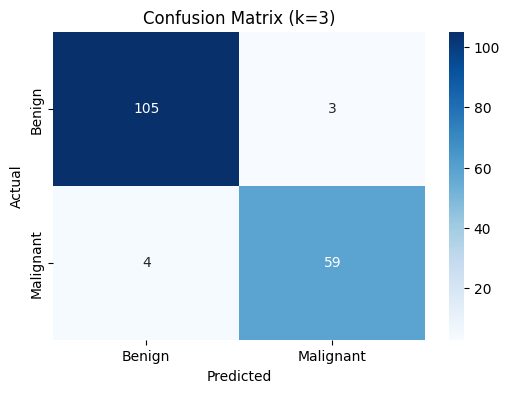

In [24]:
# Initialize and fit the model
knn = kNN(k=3, metric='euclidean')
knn.fit(X_train, y_train)

# Make predictions
start_time = time.time()
y_pred = knn.predict(X_test)
end_time = time.time()

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Evaluation Metrics (k=3):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")
print(f"Prediction time: {end_time - start_time:.4f} seconds")

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (k=3)')
plt.show()

## **Effect of k on Classification Accuracy**

- For each k from 3 to 27, fit your k‑NN on the training set and record test accuracy.

- Plot k (on the x‑axis) vs. accuracy (on the y‑axis), with markers and clear labels.

k=3: Accuracy = 0.9591
k=5: Accuracy = 0.9591
k=7: Accuracy = 0.9591
k=9: Accuracy = 0.9708
k=11: Accuracy = 0.9591
k=13: Accuracy = 0.9591
k=15: Accuracy = 0.9532
k=17: Accuracy = 0.9532
k=19: Accuracy = 0.9532
k=21: Accuracy = 0.9591
k=23: Accuracy = 0.9532
k=25: Accuracy = 0.9532
k=27: Accuracy = 0.9532
k=29: Accuracy = 0.9532


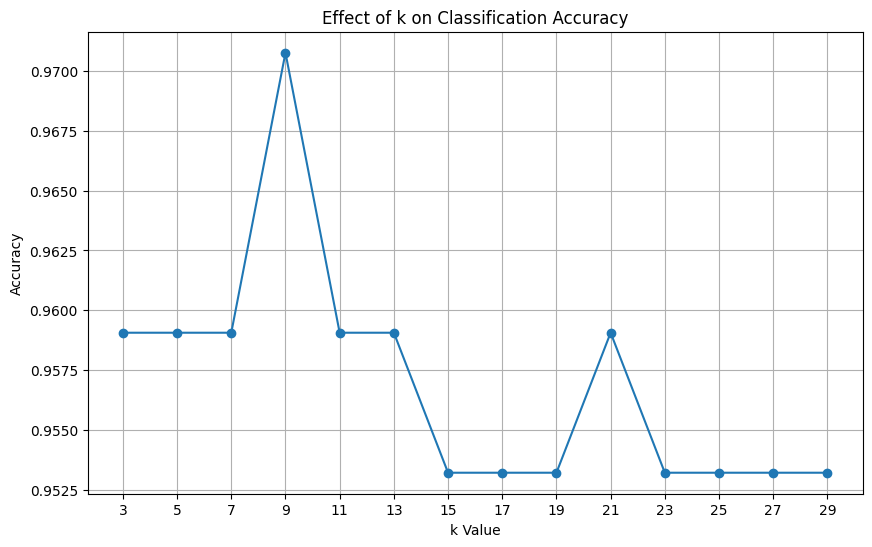


Best k: 9 with accuracy: 0.9708


In [ ]:
# Test different k values from 3 to 29 (odd numbers only)
k_values = range(3, 30, 2)
accuracies = []

for k in k_values:
    knn = kNN(k=k, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"k={k}: Accuracy = {acc:.4f}")

# Plot k vs accuracy
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.title('Effect of k on Classification Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Find best k
best_k = k_values[np.argmax(accuracies)]
best_acc = max(accuracies)
print(f"\nBest k: {best_k} with accuracy: {best_acc:.4f}")